In [1]:
import numpy as np
import matplotlib.pyplot as plt                     
import scipy as scp
from scipy.optimize import curve_fit
from scipy.fft import fft, fftfreq
from scipy.signal import find_peaks

In [2]:
#Spring C
t1, x1_a, x1_b = np.loadtxt('../Coupled Pendulum/Spring C In Phase 1.txt', unpack=True)
t2, x2_a, x2_b = np.loadtxt('../Coupled Pendulum/Spring C Out of Phase 1.txt', unpack=True)
t3, x3_a, x3_b = np.loadtxt('../Coupled Pendulum/Spring C Beats 2.txt', unpack=True)
t4, x4_a, x4_b = np.loadtxt('../Coupled Pendulum/Spring C Random 1.txt', unpack=True)

#Spring B
t5, x5_a, x5_b = np.loadtxt('../Coupled Pendulum/Spring B In Phase.txt', unpack=True)
t6, x6_a, x6_b = np.loadtxt('../Coupled Pendulum/Spring B Out of Phase.txt', unpack=True)
t7, x7_a, x7_b = np.loadtxt('../Coupled Pendulum/Spring B Beats.txt', unpack=True)

#Spring A
t8, x8_a, x8_b = np.loadtxt('../Coupled Pendulum/Spring A In Phase.txt', unpack=True)
t9, x9_a, x9_b = np.loadtxt('../Coupled Pendulum/Spring A Out of Phase.txt', unpack=True)
t10, x10_a, x10_b = np.loadtxt('../Coupled Pendulum/Spring A Beats.txt', unpack=True)

#Spring D
t11, x11_a, x11_b = np.loadtxt('../Coupled Pendulum/Spring D In Phase.txt', unpack=True)
t12, x12_a, x12_b = np.loadtxt('../Coupled Pendulum/Spring D Out of Phase.txt', unpack=True)
t13, x13_a, x13_b = np.loadtxt('../Coupled Pendulum/Spring D Beats.txt', unpack=True)

static spring constant = 0.862 N/m


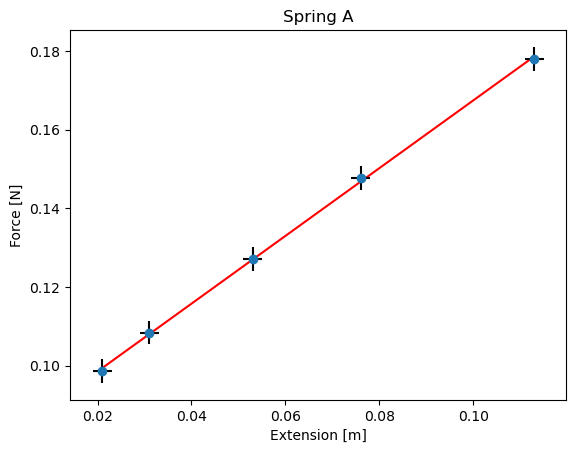

dynamic spring constant = 0.826 N/m


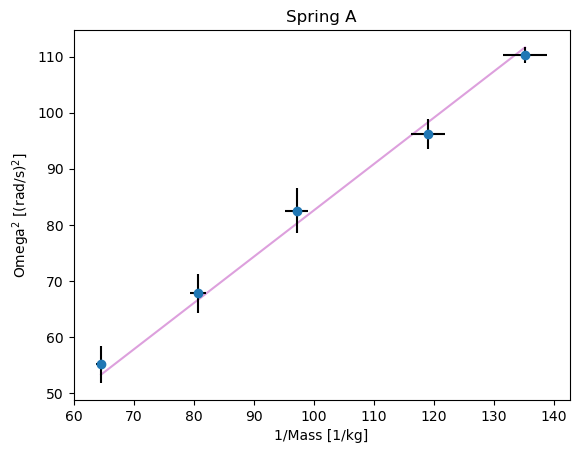

In [3]:
#PART A - Spring Constant
ms_a = 0.0159

m = np.array([10.2, 7.1, 5.0, 3.1, 2.1])*10**-3

ma_eff = m + ms_a/2

g = 9.81

#SPRING A [1 tape piece] (scale zero = 6.5 cm)

x0_a = 21.8 

x_a = np.array([33.1, 29.4, 27.1, 24.9, 23.9]) 

delx_a = (x_a - x0_a)*10**(-2)

#Errorbars
delx_a_err = np.full(len(delx_a), 0.002) 
mg_err = np.full(len(ma_eff*g), 0.0001)

#Polyfit
p_a, q_a = np.polyfit(delx_a, ma_eff*g, 1)

plt.plot(delx_a, p_a*delx_a+q_a, color='red')

print('static spring constant =', np.round(p_a, 3), 'N/m')

plt.errorbar(delx_a, ma_eff*g, xerr=delx_a_err, yerr=mg_err*30, ecolor='black', fmt='o')
plt.xlabel('Extension [m]')
plt.ylabel('Force [N]')
plt.title('Spring A')
plt.show()

# Oscillations

# t1_a = np.array([8.41, 7.68, 6.84, 6.41, 6.03])/10
# t2_a = np.array([8.46, 7.43, 7.00, 6.38, 6.00])/10
# t3_a = np.array([8.38, 7.59, 6.96, 6.44, 6.00])/10

T1_a = np.array([16.94, 15.18, 13.94, 12.88, 11.97])/20
T2_a = np.array([16.84, 15.25, 13.81, 12.81, 11.93])/20
T3_a = np.array([17.00, 15.35, 13.75, 12.75, 12.00])/20

T_a = (T1_a + T2_a + T3_a)/3

omega_a = 2*np.pi/T_a

#Polyfit
M_a = m + ms_a/3

def spring(x, a):
    return a*x

p1, q1 = curve_fit(spring, 1/M_a, omega_a**2)

plt.plot(1/M_a, spring(1/M_a, *p1), color='plum')

print('dynamic spring constant =', np.round(p1[0],3), 'N/m')

#Errorbars
omega1_err = np.array([np.std([T1_a[i], T2_a[i], T3_a[i]]) for i in range(len(T1_a))])
m1_err = ((1/(M_a-0.0001))-(1/(M_a+0.0001)))

plt.errorbar(1/M_a, omega_a**2, xerr=m1_err, yerr=omega1_err*1000, ecolor='black', fmt='o')
plt.title('Spring A')
plt.xlabel('1/Mass [1/kg]')
plt.ylabel(r'Omega$^2$ [(rad/s)$^2$]')
plt.show()

static spring constant = 0.676 N/m


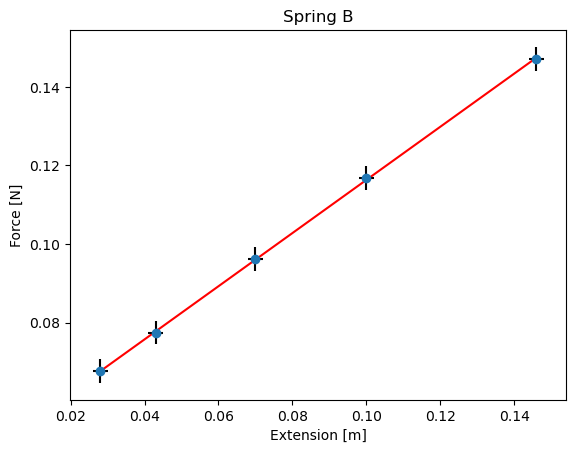

dynamic spring constant = 0.638 N/m


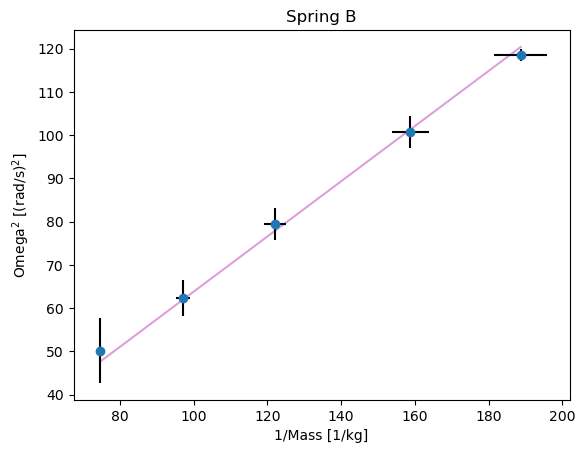

In [4]:
#SPRING B [2 tape pieces] (scale zero = 5.9 cm)
ms_b = 0.0096

mb_eff = m + ms_b/2

x0_b = 19.6

x_b = np.array([34.2, 29.6, 26.6, 23.9, 22.4])

delx_b = (x_b-x0_b)*10**(-2)

#Errorbars
delx_b_err = np.full(len(delx_b), 0.002) 
mg_err = np.full(len(mb_eff*g), 0.0001)

#Polyfit
p_b, q_b = np.polyfit(delx_b, mb_eff*g, 1)

plt.plot(delx_b, p_b*delx_b+q_b, color='red')

print('static spring constant =', np.round(p_b, 3), 'N/m')

plt.errorbar(delx_b, mb_eff*g, xerr=delx_b_err, yerr=mg_err*30, ecolor='black', fmt='o')
plt.xlabel('Extension [m]')
plt.ylabel('Force [N]')
plt.title('Spring B')
plt.show()

#Oscillations

T1_b = np.array([8.97, 7.97, 7.06, 6.22, 5.78])/10
T2_b = np.array([8.85, 7.90, 7.00, 6.31,5.78])/10
T3_b = np.array([8.79, 8.00, 7.09, 6.25, 5.75])/10

T_b = (T1_b + T2_b + T3_b)/3

omega_b = 2*np.pi/T_b

#Polyfit
M_b = m + ms_b/3

def spring(x, a):
    return a*x

p2, q2 = curve_fit(spring, 1/M_b, omega_b**2)

plt.plot(1/M_b, spring(1/M_b, *p2), color='plum')

print('dynamic spring constant =', np.round(p2[0],3), 'N/m')

#Errorbars
omega2_err = np.array([np.std([T1_b[i], T2_b[i], T3_b[i]]) for i in range(len(T1_b))])
m2_err = ((1/(M_b-0.0001))-(1/(M_b+0.0001)))

plt.errorbar(1/M_b, omega_b**2, xerr=m2_err, yerr=omega2_err*1000, ecolor='black', fmt='o')
plt.title('Spring B')
plt.xlabel('1/Mass [1/kg]')
plt.ylabel(r'Omega$^2$ [(rad/s)$^2$]')
plt.show()

static spring constant = 2.626 N/m


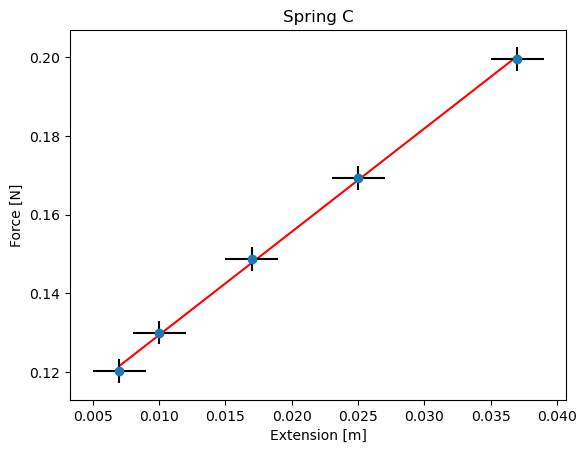

dynamic spring constant = 2.366 N/m


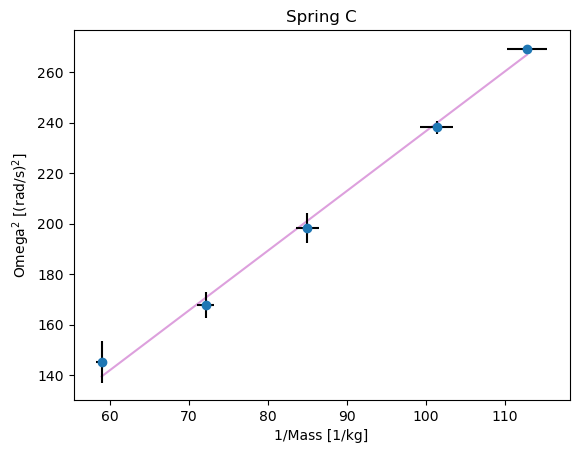

In [5]:
#Spring C [3 tape pieces] (scale zero = 6.9 cm)
ms_c = 0.0203

mc_eff = m + ms_c/2

x0_c = 20.2

x_c = np.array([23.9, 22.7, 21.9, 21.2, 20.9])

delx_c = (x_c-x0_c)*10**(-2)

#Errorbars
delx_c_err = np.full(len(delx_c), 0.002) 
mg_err = np.full(len(mc_eff*g), 0.0001)

#Polyfit
p_c, q_c = np.polyfit(delx_c, mc_eff*g, 1)

plt.plot(delx_c, p_c*delx_c+q_c, color='red')

print('static spring constant =', np.round(p_c, 3), 'N/m')

plt.errorbar(delx_c, mc_eff*g, xerr=delx_c_err, yerr=mg_err*30, ecolor='black', fmt='o')
plt.xlabel('Extension [m]')
plt.ylabel('Force [N]')
plt.title('Spring C')
plt.show()

#Oscillations
T1_c = np.array([10.50, 9.72, 8.96, 8.12, 7.65])/20
T2_c = np.array([10.31, 9.75, 8.97, 8.13, 7.66])/20
T3_c = np.array([10.47, 9.63, 8.84, 8.18, 7.67])/20

T_c = (T1_c + T2_c + T3_c)/3

omega_c = 2*np.pi/T_c

#Polyfit
M_c = m + ms_c/3

def spring(x, a):
    return a*x

p3, q3 = curve_fit(spring, 1/M_c, omega_c**2)

plt.plot(1/M_c, spring(1/M_c, *p3), color='plum')

print('dynamic spring constant =', np.round(p3[0],3), 'N/m')

#Errorbars
omega3_err = np.array([np.std([T1_c[i], T2_c[i], T3_c[i]]) for i in range(len(T1_c))])
m3_err = ((1/(M_c-0.0001))-(1/(M_c+0.0001)))

plt.errorbar(1/M_c, omega_c**2, xerr=m3_err, yerr=omega3_err*2000, ecolor='black', fmt='o')
plt.title('Spring C')
plt.xlabel('1/Mass [1/kg]')
plt.ylabel(r'Omega$^2$ [(rad/s)$^2$]')
plt.show()

static spring constant = 2.533 N/m


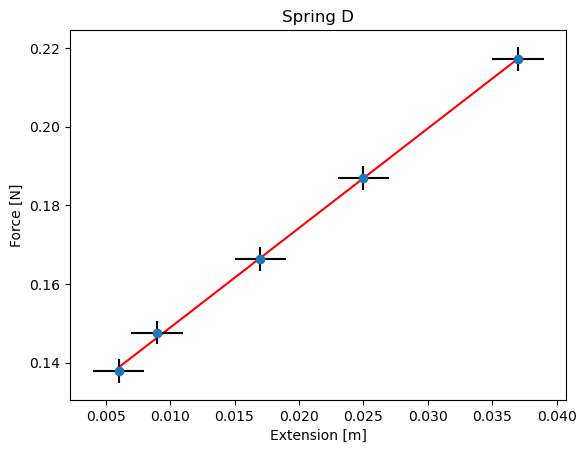

dynamic spring constant = 2.195 N/m


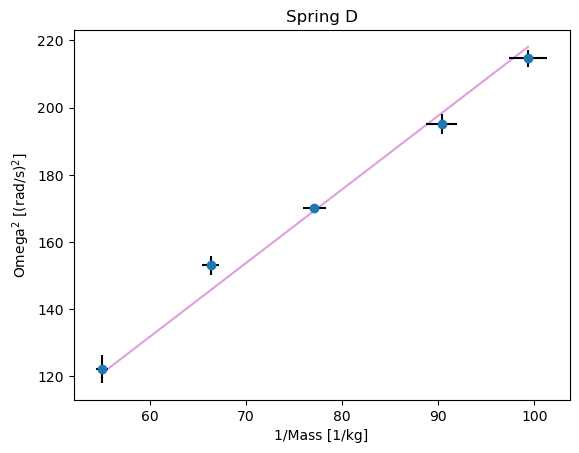

In [6]:
#SPRING D [0 tape pieces] (scale zero = 7.0 cm)
ms_d = 0.0239

md_eff = m + ms_d/2

x0_d = 19.7

x_d = np.array([23.4, 22.2, 21.4, 20.6, 20.3])

delx_d = (x_d-x0_d)*10**(-2)

#Errorbars
delx_d_err = np.full(len(delx_d), 0.002) 
mg_err = np.full(len(md_eff*g), 0.0001)

#Polyfit
p_d, q_d = np.polyfit(delx_d, md_eff*g, 1)

plt.plot(delx_d, p_d*delx_d+q_d, color='red')

print('static spring constant =', np.round(p_d, 3), 'N/m')

plt.errorbar(delx_d, md_eff*g, xerr=delx_d_err, yerr=mg_err*30, ecolor='black', fmt='o')
plt.xlabel('Extension [m]')
plt.ylabel('Force [N]')
plt.title('Spring D')
plt.show()

#Oscillations
T1_d = np.array([11.41, 10.19, 9.62, 9.00, 8.54])/20
T2_d = np.array([11.31, 10.16, 9.63, 9.03, 8.59 ])/20
T3_d = np.array([11.38, 10.12, 9.65, 8.96, 8.60 ])/20

T_d = (T1_d + T2_d + T3_d)/3

omega_d = 2*np.pi/T_d

#Polyfit
ms_d = 0.0239

M_d = m + ms_d/3

def spring(x, a):
    return a*x

p4, q4 = curve_fit(spring, 1/M_d, omega_d**2)

plt.plot(1/M_d, spring(1/M_d, *p4), color='plum')

print('dynamic spring constant =', np.round(p4[0],3), 'N/m')

#Errorbars
omega4_err = np.array([np.std([T1_d[i], T2_d[i], T3_d[i]]) for i in range(len(T1_d))])
m4_err = ((1/(M_d-0.0001))-(1/(M_d+0.0001)))

plt.errorbar(1/M_d, omega_d**2, xerr=m4_err, yerr=omega4_err*2000, ecolor='black', fmt='o')
plt.title('Spring D')
plt.xlabel('1/Mass [1/kg]')
plt.ylabel(r'Omega$^2$ [(rad/s)$^2$]')
plt.show()

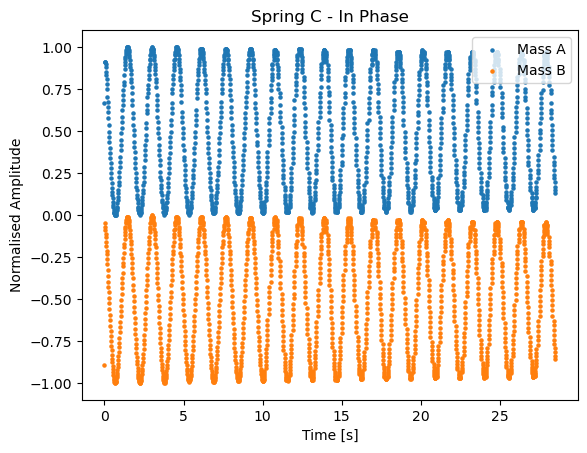

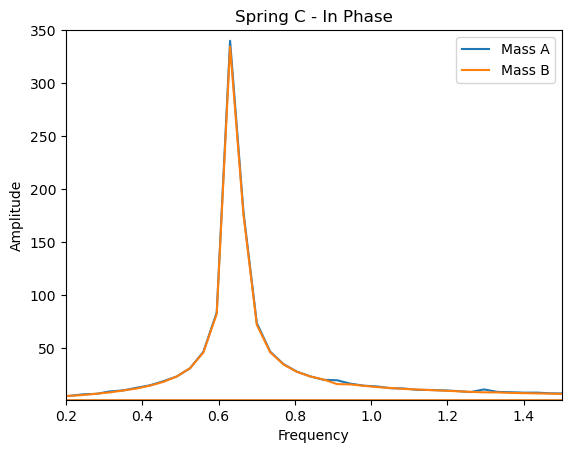

[0.6303183107469272]
[0.6303183107469272]


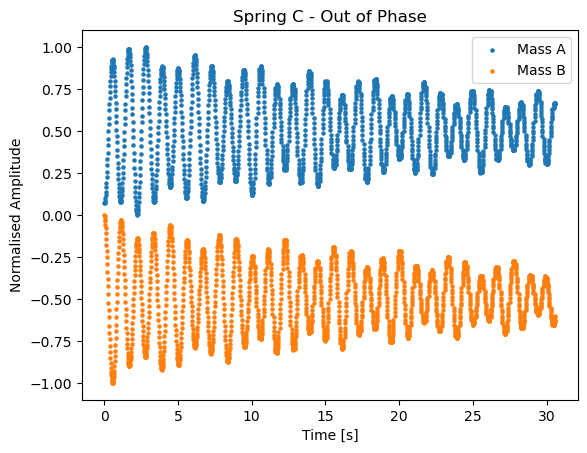

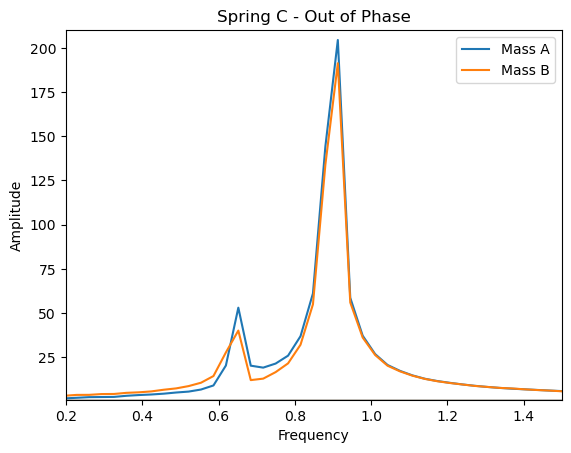

[0.9127091489313155]
[0.9127091489313155]


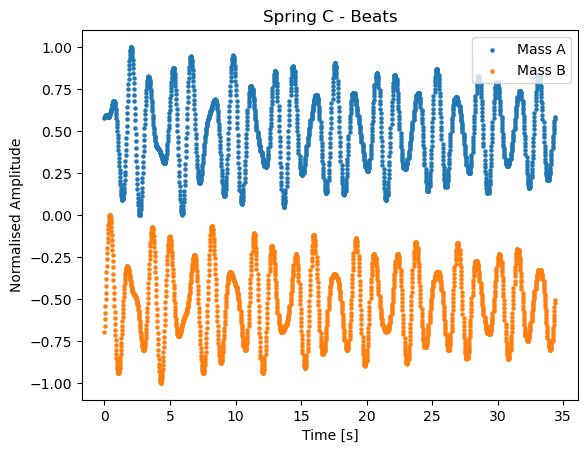

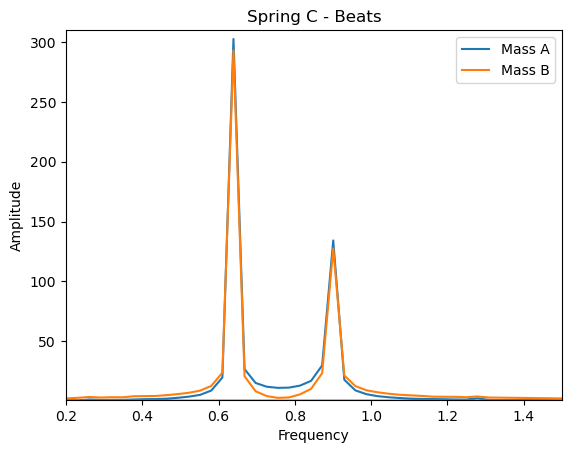

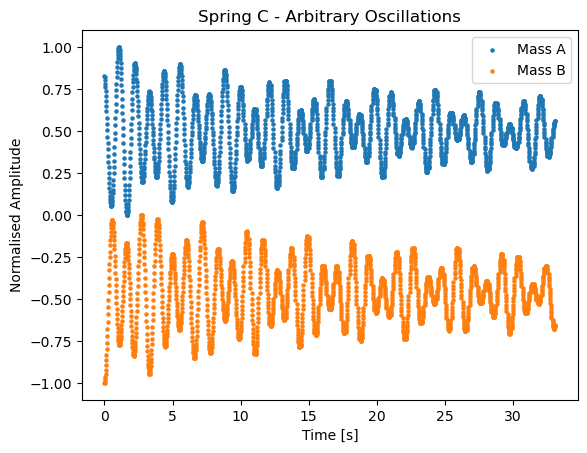

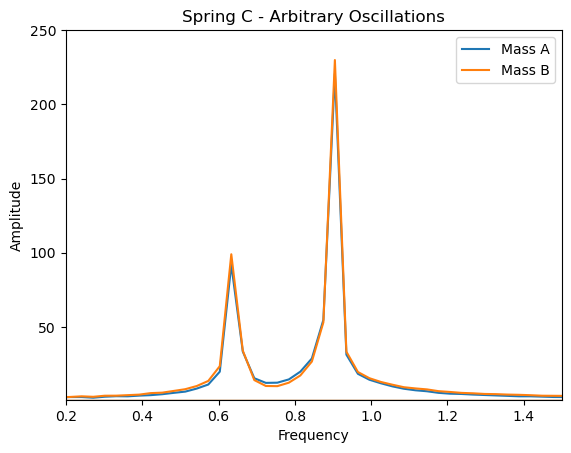

In [7]:
# SPRING C - In Phase
X1_a = (x1_a-np.min(x1_a))/(np.max(x1_a)-np.min(x1_a))
X1_b = (x1_b-np.min(x1_b))/(np.max(x1_b)-np.min(x1_b))

plt.scatter(t1, X1_a, s=5, label='Mass A')
plt.scatter(t1, X1_b-1, s=5, label='Mass B')
plt.xlabel('Time [s]')
plt.ylabel('Normalised Amplitude')
plt.title('Spring C - In Phase')
plt.legend(loc=1)
plt.show()

# Fast Fourier Transform (FFT)
fft1_a = fft(X1_a)
f1_a = fftfreq(len(X1_a), t1[1] - t1[0])
fft1_b = fft(X1_b)
f1_b = fftfreq(len(X1_b), t1[1] - t1[0])

# Frequency spectrum
plt.plot(f1_a, np.abs(fft1_a), label='Mass A')
plt.plot(f1_b, np.abs(fft1_b), label='Mass B')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.title('Spring C - In Phase')
plt.xlim(0.2, 1.5)
plt.ylim(1, 350)
plt.legend(loc=1)
plt.show()

# Peaks
fft1_a_peaks = []
fft1_b_peaks = []
        
for i in range(len(fft1_a)):
    
        if np.abs(fft1_a[i]) > 300 and np.abs(fft1_a[i]) < 400 and f1_a[i] > 0:
                
                fft1_a_peaks.append(f1_a[i])
                
        if np.abs(fft1_b[i]) > 300 and np.abs(fft1_b[i]) < 400 and f1_b[i] > 0:
                
                fft1_b_peaks.append(f1_b[i])

print(fft1_a_peaks)
print(fft1_b_peaks)
                
# SPRING C - Out of Phase
X2_a = (x2_a-np.min(x2_a))/(np.max(x2_a)-np.min(x2_a))
X2_b = (x2_b-np.min(x2_b))/(np.max(x2_b)-np.min(x2_b))

plt.scatter(t2, X2_a, s=5, label='Mass A')
plt.scatter(t2, X2_b-1, s=5, label='Mass B')
plt.xlabel('Time [s]')
plt.ylabel('Normalised Amplitude')
plt.title('Spring C - Out of Phase')
plt.legend(loc=1)
plt.show()

# Fast Fourier Transform (FFT)
fft2_a = fft(X2_a)
f2_a = fftfreq(len(X2_a), t2[1] - t2[0])
fft2_b = fft(X2_b)
f2_b = fftfreq(len(X2_b), t2[1] - t2[0])

# Frequency spectrum
plt.plot(f2_a, np.abs(fft2_a), label='Mass A')
plt.plot(f2_b, np.abs(fft2_b), label='Mass B')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.title('Spring C - Out of Phase')
plt.xlim(0.2, 1.5)
plt.ylim(1, 210)
plt.legend(loc=1)
plt.show()

# Peaks
fft2_a_peaks = []
fft2_b_peaks = []
        
for i in range(len(fft2_a)):
    
        if np.abs(fft2_a[i]) > 175 and np.abs(fft2_a[i]) < 225 and f2_a[i] > 0:
                
                fft2_a_peaks.append(f2_a[i])
                
        if np.abs(fft2_b[i]) > 175 and np.abs(fft2_b[i]) < 225 and f2_b[i] > 0:
                
                fft2_b_peaks.append(f2_b[i])

print(fft2_a_peaks)
print(fft2_b_peaks)



# SPRING C - Beats
X3_a = (x3_a-np.min(x3_a))/(np.max(x3_a)-np.min(x3_a))
X3_b = (x3_b-np.min(x3_b))/(np.max(x3_b)-np.min(x3_b))

plt.scatter(t3, X3_a, s=5, label='Mass A')
plt.scatter(t3, X3_b-1, s=5, label='Mass B')
plt.xlabel('Time [s]')
plt.ylabel('Normalised Amplitude')
plt.title('Spring C - Beats')
plt.legend(loc=1)
plt.show()

# Fast Fourier Transform (FFT)
fft3_a = fft(X3_a)
f3_a = fftfreq(len(X3_a), t3[1] - t3[0])
fft3_b = fft(X3_b)
f3_b = fftfreq(len(X3_b), t3[1] - t3[0])

# Frequency spectrum
plt.plot(f3_a, np.abs(fft3_a), label='Mass A')
plt.plot(f3_b, np.abs(fft3_b), label='Mass B')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.title('Spring C - Beats')
plt.xlim(0.2, 1.5)
plt.ylim(1, 310)
plt.legend(loc=1)
plt.show()



#SPRING C - Arbitrary Oscillations
X4_a = (x4_a-np.min(x4_a))/(np.max(x4_a)-np.min(x4_a))
X4_b = (x4_b-np.min(x4_b))/(np.max(x4_b)-np.min(x4_b))

plt.scatter(t4, X4_a, s=5, label='Mass A')
plt.scatter(t4, X4_b-1, s=5, label='Mass B')
plt.xlabel('Time [s]')
plt.ylabel('Normalised Amplitude')
plt.title('Spring C - Arbitrary Oscillations')
plt.legend(loc=1)
plt.show()

# Fast Fourier Transform (FFT)
fft4_a = fft(X4_a)
f4_a = fftfreq(len(X4_a), t4[1] - t4[0])
fft4_b = fft(X4_b)
f4_b = fftfreq(len(X4_b), t4[1] - t4[0])

# Frequency spectrum
plt.plot(f4_a, np.abs(fft4_a), label='Mass A')
plt.plot(f4_b, np.abs(fft4_b), label='Mass B')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.title('Spring C - Arbitrary Oscillations')
plt.xlim(0.2, 1.5)
plt.ylim(1, 250)
plt.legend(loc=1)
plt.show()

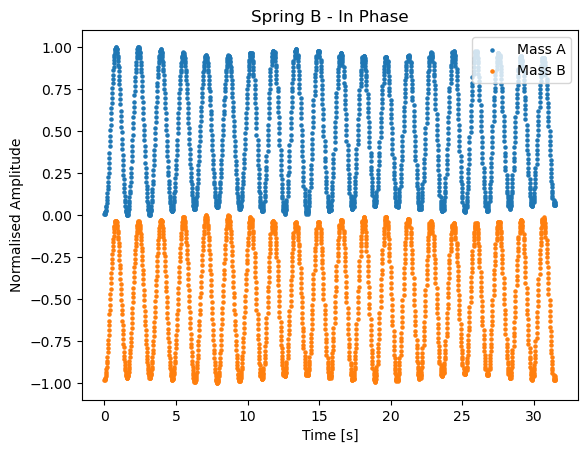

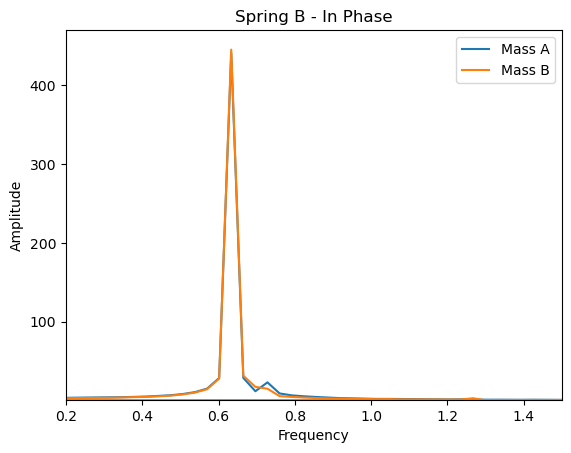

[0.6333182392486313]
[0.6333182392486313]


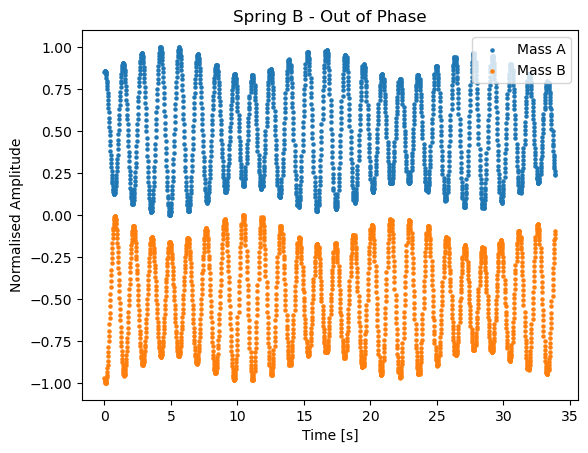

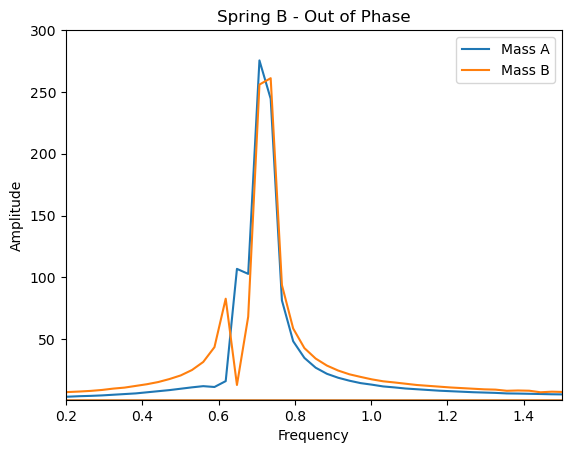

[0.7072469234758829]
[0.7072469234758829, 0.736715545287378]


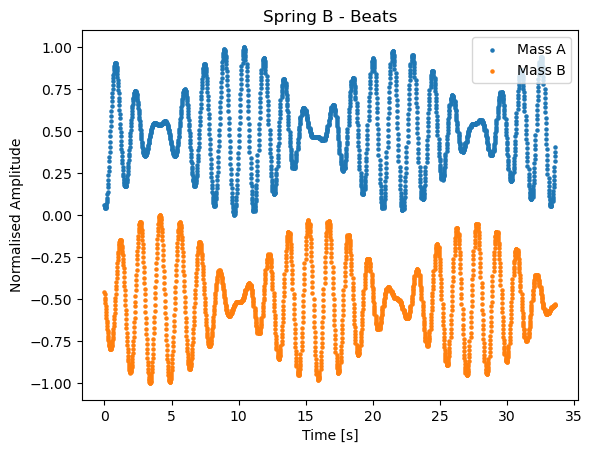

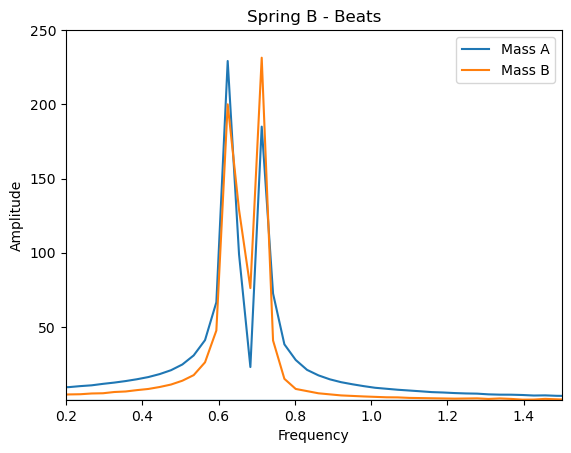

In [8]:
# SPRING B - In Phase
X5_a = (x5_a-np.min(x5_a))/(np.max(x5_a)-np.min(x5_a))
X5_b = (x5_b-np.min(x5_b))/(np.max(x5_b)-np.min(x5_b))

plt.scatter(t5, X5_a, s=5, label='Mass A')
plt.scatter(t5, X5_b-1, s=5, label='Mass B')
plt.xlabel('Time [s]')
plt.ylabel('Normalised Amplitude')
plt.title('Spring B - In Phase')
plt.legend(loc=1)
plt.show()

# Fast Fourier Transform (FFT)
fft5_a = fft(X5_a)
f5_a = fftfreq(len(X5_a), t5[1] - t5[0])
fft5_b = fft(X5_b)
f5_b = fftfreq(len(X5_b), t5[1] - t5[0])

# Frequency spectrum
plt.plot(f5_a, np.abs(fft5_a), label='Mass A')
plt.plot(f5_b, np.abs(fft5_b), label='Mass B')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.title('Spring B - In Phase')
plt.xlim(0.2, 1.5)
plt.ylim(1, 470)
plt.legend(loc=1)
plt.show()

# Peaks
fft5_a_peaks = []
fft5_b_peaks = []
        
for i in range(len(fft5_a)):
    
        if np.abs(fft5_a[i]) > 400 and np.abs(fft5_a[i]) < 450 and f5_a[i] > 0:
                
                fft5_a_peaks.append(f5_a[i])
                
        if np.abs(fft5_b[i]) > 400 and np.abs(fft5_b[i]) < 450 and f5_b[i] > 0:
                
                fft5_b_peaks.append(f5_b[i])

print(fft5_a_peaks)
print(fft5_b_peaks)



# SPRING B - Out of Phase
X6_a = (x6_a-np.min(x6_a))/(np.max(x6_a)-np.min(x6_a))
X6_b = (x6_b-np.min(x6_b))/(np.max(x6_b)-np.min(x6_b))

plt.scatter(t6, X6_a, s=5, label='Mass A')
plt.scatter(t6, X6_b-1, s=5, label='Mass B')
plt.xlabel('Time [s]')
plt.ylabel('Normalised Amplitude')
plt.title('Spring B - Out of Phase')
plt.legend(loc=1)
plt.show()

# Fast Fourier Transform (FFT)
fft6_a = fft(X6_a)
f6_a = fftfreq(len(X6_a), t6[1] - t6[0])
fft6_b = fft(X6_b)
f6_b = fftfreq(len(X6_b), t6[1] - t6[0])

# Frequency spectrum
plt.plot(f6_a, np.abs(fft6_a), label='Mass A')
plt.plot(f6_b, np.abs(fft6_b), label='Mass B')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.title('Spring B - Out of Phase')
plt.xlim(0.2, 1.5)
plt.ylim(1, 300)
plt.legend(loc=1)
plt.show()

# Peaks
fft6_a_peaks = []
fft6_b_peaks = []
        
for i in range(len(fft6_a)):
    
        if np.abs(fft6_a[i]) > 250 and np.abs(fft6_a[i]) < 300 and f6_a[i] > 0:
                
                fft6_a_peaks.append(f6_a[i])
                
        if np.abs(fft6_b[i]) > 250 and np.abs(fft6_b[i]) < 300 and f6_b[i] > 0:
                
                fft6_b_peaks.append(f6_b[i])

print(fft6_a_peaks)
print(fft6_b_peaks)


# SPRING B - Beats
X7_a = (x7_a-np.min(x7_a))/(np.max(x7_a)-np.min(x7_a))
X7_b = (x7_b-np.min(x7_b))/(np.max(x7_b)-np.min(x7_b))

plt.scatter(t7, X7_a, s=5, label='Mass A')
plt.scatter(t7, X7_b-1, s=5, label='Mass B')
plt.xlabel('Time [s]')
plt.ylabel('Normalised Amplitude')
plt.title('Spring B - Beats')
plt.legend(loc=1)
plt.show()

# Fast Fourier Transform (FFT)
fft7_a = fft(X7_a)
f7_a = fftfreq(len(X7_a), t7[1] - t7[0])
fft7_b = fft(X7_b)
f7_b = fftfreq(len(X7_b), t7[1] - t7[0])

# Frequency spectrum
plt.plot(f7_a, np.abs(fft7_a), label='Mass A')
plt.plot(f7_b, np.abs(fft7_b), label='Mass B')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.title('Spring B - Beats')
plt.xlim(0.2, 1.5)
plt.ylim(1, 250)
plt.legend(loc=1)
plt.show()

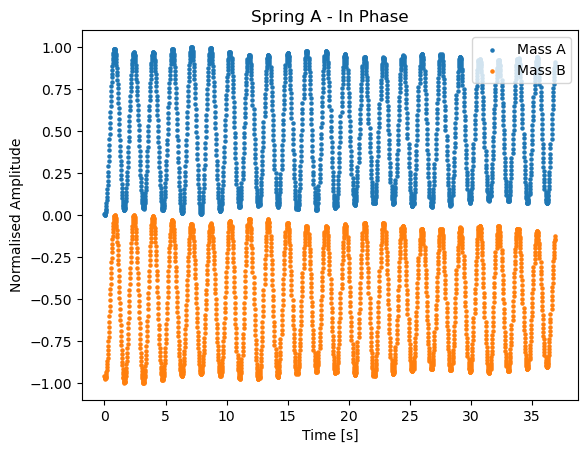

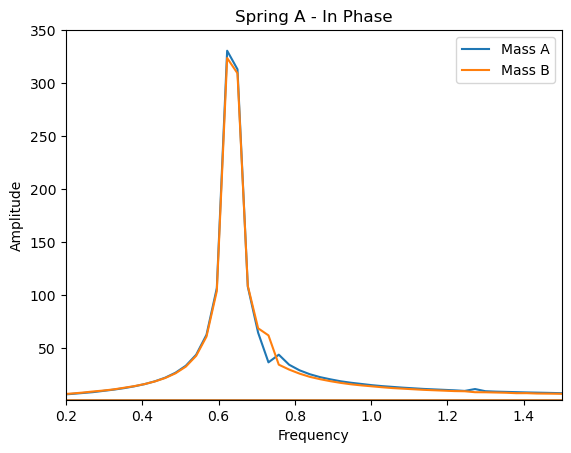

[0.622624551981029, 0.6496951846758563]
[0.622624551981029, 0.6496951846758563]


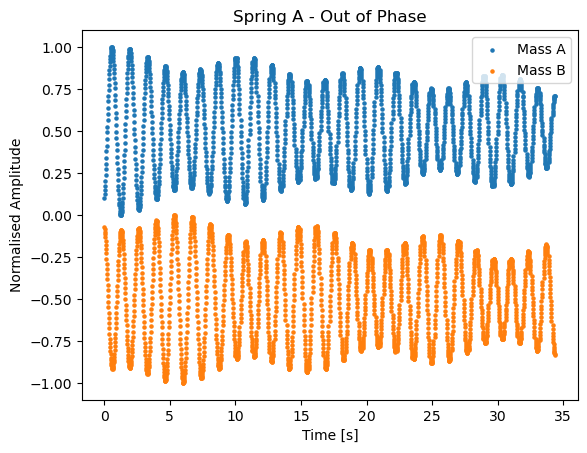

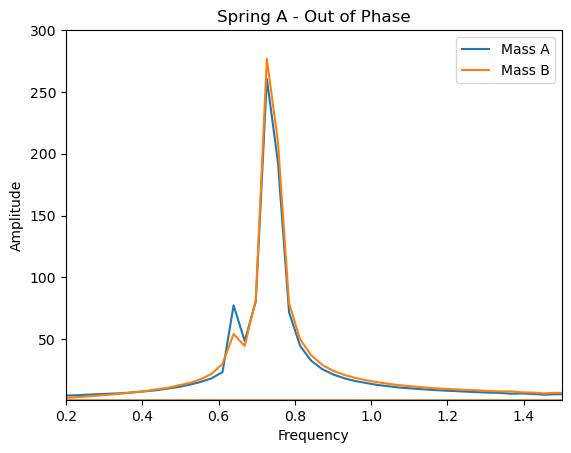

[0.7267019359339574]
[0.7267019359339574]


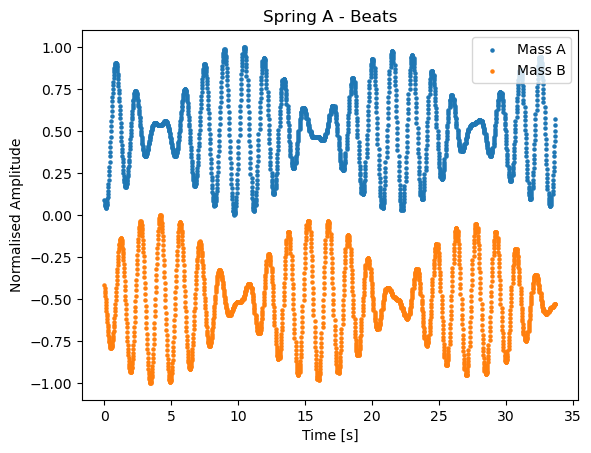

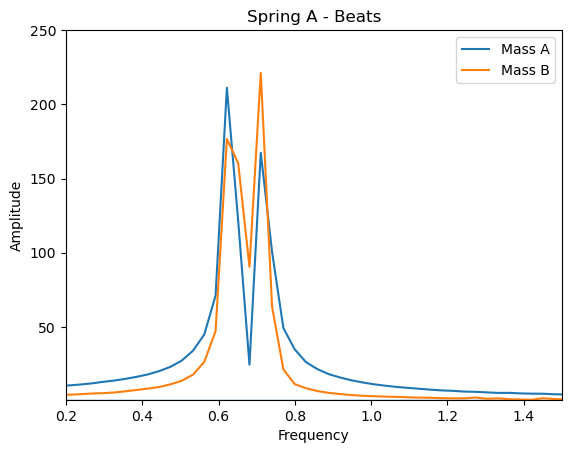

In [9]:
# SPRING A - In Phase
X8_a = (x8_a-np.min(x8_a))/(np.max(x8_a)-np.min(x8_a))
X8_b = (x8_b-np.min(x8_b))/(np.max(x8_b)-np.min(x8_b))

plt.scatter(t8, X8_a, s=5, label='Mass A')
plt.scatter(t8, X8_b-1, s=5, label='Mass B')
plt.xlabel('Time [s]')
plt.ylabel('Normalised Amplitude')
plt.title('Spring A - In Phase')
plt.legend(loc=1)
plt.show()

# Fast Fourier Transform (FFT)
fft8_a = fft(X8_a)
f8_a = fftfreq(len(X8_a), t8[1] - t8[0])
fft8_b = fft(X8_b)
f8_b = fftfreq(len(X8_b), t8[1] - t8[0])

# Frequency spectrum
plt.plot(f8_a, np.abs(fft8_a), label='Mass A')
plt.plot(f8_b, np.abs(fft8_b), label='Mass B')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.title('Spring A - In Phase')
plt.xlim(0.2, 1.5)
plt.ylim(1, 350)
plt.legend(loc=1)
plt.show()

# Peaks
fft8_a_peaks = []
fft8_b_peaks = []
        
for i in range(len(fft8_a)):
    
        if np.abs(fft8_a[i]) > 300 and np.abs(fft8_a[i]) < 400 and f8_a[i] > 0:
                
                fft8_a_peaks.append(f8_a[i])
                
        if np.abs(fft8_b[i]) > 300 and np.abs(fft8_b[i]) < 400 and f8_b[i] > 0:
                
                fft8_b_peaks.append(f8_b[i])

print(fft8_a_peaks)
print(fft8_b_peaks)



#SPRING A - Out of Phase
X9_a = (x9_a-np.min(x9_a))/(np.max(x9_a)-np.min(x9_a))
X9_b = (x9_b-np.min(x9_b))/(np.max(x9_b)-np.min(x9_b))

plt.scatter(t9, X9_a, s=5, label='Mass A')
plt.scatter(t9, X9_b-1, s=5, label='Mass B')
plt.xlabel('Time [s]')
plt.ylabel('Normalised Amplitude')
plt.title('Spring A - Out of Phase')
plt.legend(loc=1)
plt.show()

# Fast Fourier Transform (FFT)
fft9_a = fft(X9_a)
f9_a = fftfreq(len(X9_a), t9[1] - t9[0])
fft9_b = fft(X9_b)
f9_b = fftfreq(len(X9_b), t9[1] - t9[0])

# Frequency spectrum
plt.plot(f9_a, np.abs(fft9_a), label='Mass A')
plt.plot(f9_b, np.abs(fft9_b), label='Mass B')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.title('Spring A - Out of Phase')
plt.xlim(0.2, 1.5)
plt.ylim(1, 300)
plt.legend(loc=1)
plt.show()

# Peaks
fft9_a_peaks = []
fft9_b_peaks = []
        
for i in range(len(fft9_a)):
    
        if np.abs(fft9_a[i]) > 250 and np.abs(fft9_a[i]) < 300 and f9_a[i] > 0:
                
                fft9_a_peaks.append(f9_a[i])
                
        if np.abs(fft9_b[i]) > 250 and np.abs(fft9_b[i]) < 300 and f9_b[i] > 0:
                
                fft9_b_peaks.append(f9_b[i])

print(fft9_a_peaks)
print(fft9_b_peaks)


#SPRING A - Beats
X10_a = (x10_a-np.min(x10_a))/(np.max(x10_a)-np.min(x10_a))
X10_b = (x10_b-np.min(x10_b))/(np.max(x10_b)-np.min(x10_b))

plt.scatter(t10, X10_a, s=5, label='Mass A')
plt.scatter(t10, X10_b-1, s=5, label='Mass B')
plt.xlabel('Time [s]')
plt.ylabel('Normalised Amplitude')
plt.title('Spring A - Beats')
plt.legend(loc=1)
plt.show()

# Fast Fourier Transform (FFT)
fft10_a = fft(X10_a)
f10_a = fftfreq(len(X10_a), t10[1] - t10[0])
fft10_b = fft(X10_b)
f10_b = fftfreq(len(X10_b), t10[1] - t10[0])

# Frequency spectrum
plt.plot(f10_a, np.abs(fft10_a), label='Mass A')
plt.plot(f10_b, np.abs(fft10_b), label='Mass B')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.title('Spring A - Beats')
plt.xlim(0.2, 1.5)
plt.ylim(1, 250)
plt.legend(loc=1)
plt.show()

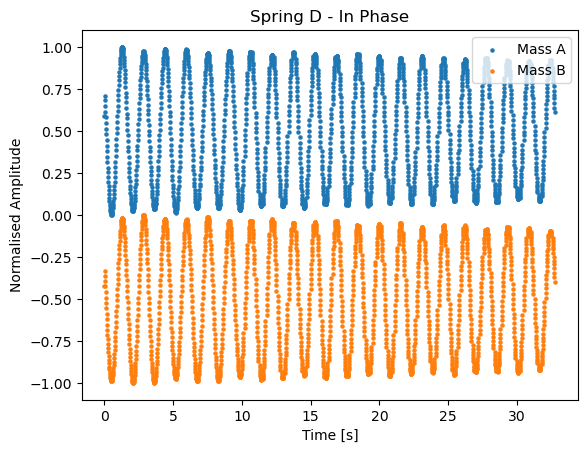

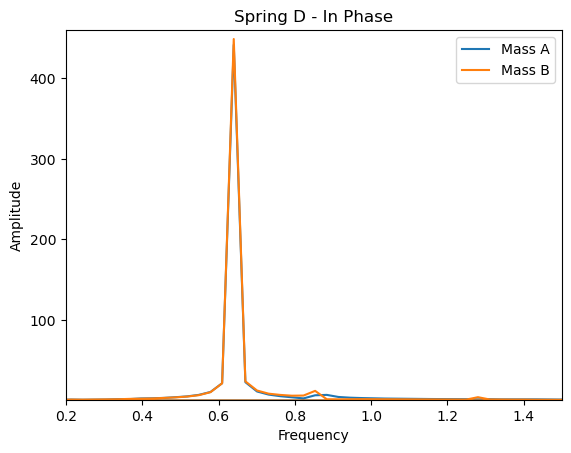

[0.6399414910636742]
[0.6399414910636742]


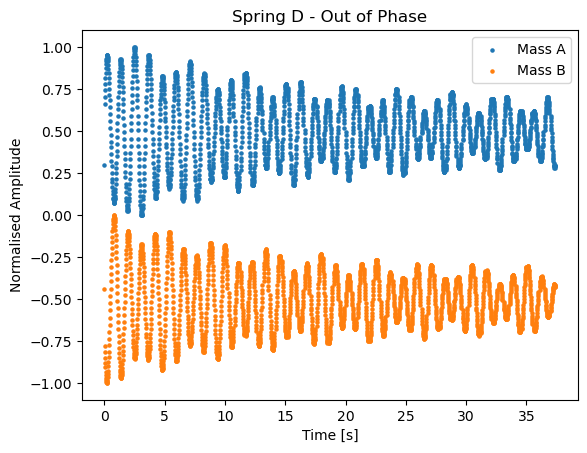

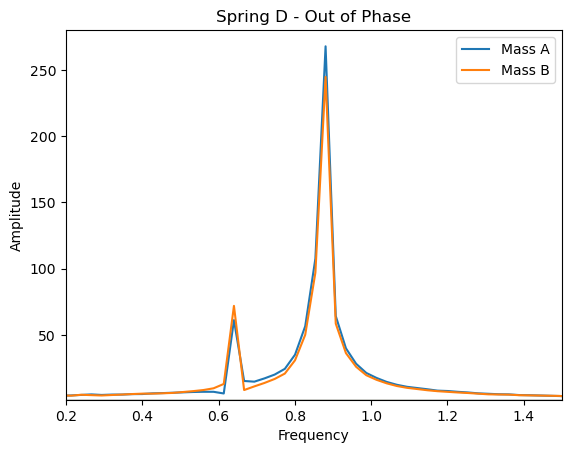

[0.8805917576611482]
[0.8805917576611482]


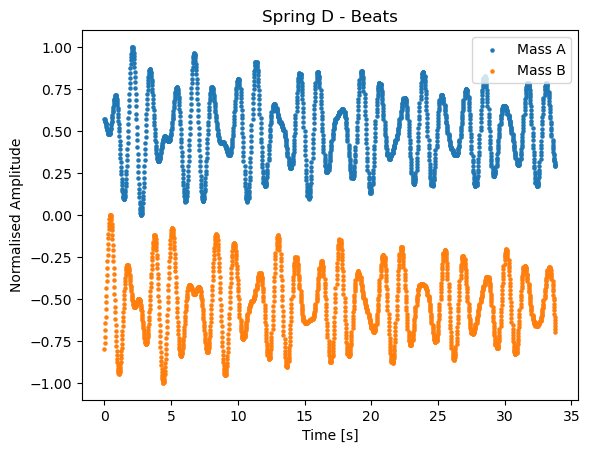

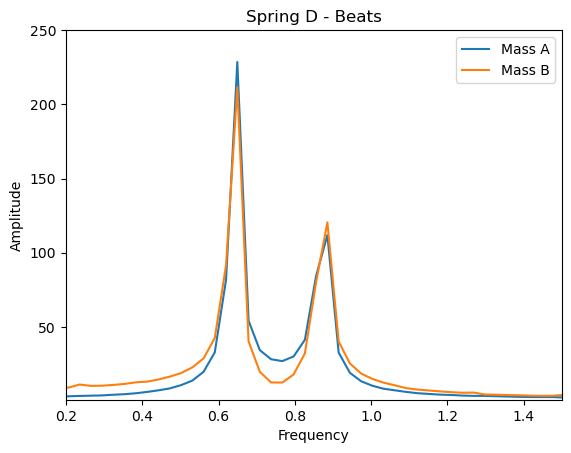

In [10]:
#SPRING D - In Phase
X11_a = (x11_a-np.min(x11_a))/(np.max(x11_a)-np.min(x11_a))
X11_b = (x11_b-np.min(x11_b))/(np.max(x11_b)-np.min(x11_b))

plt.scatter(t11, X11_a, s=5, label='Mass A')
plt.scatter(t11, X11_b-1, s=5, label='Mass B')
plt.xlabel('Time [s]')
plt.ylabel('Normalised Amplitude')
plt.title('Spring D - In Phase')
plt.legend(loc=1)
plt.show()

# Fast Fourier Transform (FFT)
fft11_a = fft(X11_a)
f11_a = fftfreq(len(X11_a), t11[1] - t11[0])
fft11_b = fft(X11_b)
f11_b = fftfreq(len(X11_b), t11[1] - t11[0])

# Frequency spectrum
plt.plot(f11_a, np.abs(fft11_a), label='Mass A')
plt.plot(f11_b, np.abs(fft11_b), label='Mass B')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.title('Spring D - In Phase')
plt.xlim(0.2, 1.5)
plt.ylim(1, 460)
plt.legend(loc=1)
plt.show()

# Peaks
fft11_a_peaks = []
fft11_b_peaks = []
        
for i in range(len(fft11_a)):
    
        if np.abs(fft11_a[i]) > 400 and np.abs(fft11_a[i]) < 450 and f11_a[i] > 0:
                
                fft11_a_peaks.append(f11_a[i])
                
        if np.abs(fft11_b[i]) > 400 and np.abs(fft11_b[i]) < 450 and f11_b[i] > 0:
                
                fft11_b_peaks.append(f11_b[i])

print(fft11_a_peaks)
print(fft11_b_peaks)



#SPRING D - Out of Phase
X12_a = (x12_a-np.min(x12_a))/(np.max(x12_a)-np.min(x12_a))
X12_b = (x12_b-np.min(x12_b))/(np.max(x12_b)-np.min(x12_b))

plt.scatter(t12, X12_a, s=5, label='Mass A')
plt.scatter(t12, X12_b-1, s=5, label='Mass B')
plt.xlabel('Time [s]')
plt.ylabel('Normalised Amplitude')
plt.title('Spring D - Out of Phase')
plt.legend(loc=1)
plt.show()

# Fast Fourier Transform (FFT)
fft12_a = fft(X12_a)
f12_a = fftfreq(len(X12_a), t12[1] - t12[0])
fft12_b = fft(X12_b)
f12_b = fftfreq(len(X12_b), t12[1] - t12[0])

# Frequency spectrum
plt.plot(f12_a, np.abs(fft12_a), label='Mass A')
plt.plot(f12_b, np.abs(fft12_b), label='Mass B')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.title('Spring D - Out of Phase')
plt.xlim(0.2, 1.5)
plt.ylim(1, 280)
plt.legend(loc=1)
plt.show()

# Peaks
fft12_a_peaks = []
fft12_b_peaks = []
        
for i in range(len(fft12_a)):
    
        if np.abs(fft12_a[i]) > 200 and np.abs(fft12_a[i]) < 300 and f12_a[i] > 0:
                
                fft12_a_peaks.append(f12_a[i])
                
        if np.abs(fft12_b[i]) > 200 and np.abs(fft12_b[i]) < 300 and f12_b[i] > 0:
                
                fft12_b_peaks.append(f12_b[i])

print(fft12_a_peaks)
print(fft12_b_peaks)



#SPRING D - Beats
X13_a = (x13_a-np.min(x13_a))/(np.max(x13_a)-np.min(x13_a))
X13_b = (x13_b-np.min(x13_b))/(np.max(x13_b)-np.min(x13_b))

plt.scatter(t13, X13_a, s=5, label='Mass A')
plt.scatter(t13, X13_b-1, s=5, label='Mass B')
plt.xlabel('Time [s]')
plt.ylabel('Normalised Amplitude')
plt.title('Spring D - Beats')
plt.legend(loc=1)
plt.show()

# Fast Fourier Transform (FFT)
fft13_a = fft(X13_a)
f13_a = fftfreq(len(X13_a), t13[1] - t13[0])
fft13_b = fft(X13_b)
f13_b = fftfreq(len(X13_b), t13[1] - t13[0])

# Frequency spectrum
plt.plot(f13_a, np.abs(fft13_a), label='Mass A')
plt.plot(f13_b, np.abs(fft13_b), label='Mass B')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.title('Spring D - Beats')
plt.xlim(0.2, 1.5)
plt.ylim(1, 250)
plt.legend(loc=1)
plt.show()